# Monte Carlo methods

<img src="https://cdn.travelpulse.com/images/fbaaedf4-a957-df11-b491-006073e71405/4d899e6b-e5f5-4e21-a70f-5cd3640b1198/630x355.jpg" width=1200>

https://en.wikipedia.org/wiki/Monte_Carlo_method

## Calculating $\pi$ by throwing darts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def draw_circle(ndarts=0):
    from math import pi as π

    fig, ax = plt.subplots(figsize=(6,6))
    for _ax in ['left', 'right', 'top', 'bottom']:
        ax.spines[_ax].set_visible(False)
    for c in (-1, 1):
        ax.hlines(c, -1, 1, 'k', lw=1)
        ax.vlines(c, -1, 1, 'k', lw=1)
    ax.grid(True, alpha=0.2)
    plt.scatter(0, 0, marker='x', color='b')

    θ = np.linspace(0, 2*π, 500)
    circle = np.cos(θ), np.sin(θ)
    ax.plot(circle[0],circle[1], 'b-')

    if ndarts>0:
        rng = np.random.default_rng()
        darts = rng.uniform(-1,1,size=(ndarts,2))
        ins = darts[darts[:,0]**2 + darts[:,1]**2 <= 1]
        outs = darts[darts[:,0]**2 + darts[:,1]**2 > 1]
        plt.scatter(ins[:,0], ins[:,1], color='#00cc66')
        plt.scatter(outs[:,0], outs[:,1], color='r')
        ratio = len(ins)/ndarts
        print('{}/{}={} darts are inside the circle'.format(len(ins), ndarts, ratio))
        return ratio

71/100=0.71 darts are inside the circle


0.71

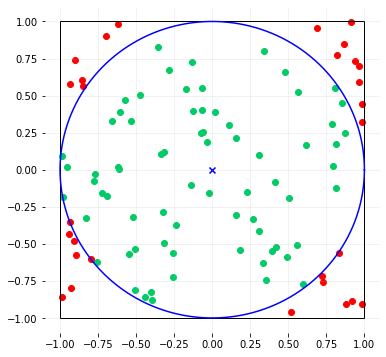

In [ ]:
draw_circle(100)

In [ ]:
.78748 * 4

3.14992

In [ ]:
.7894 * 4

3.1576

In [ ]:
rng = np.random.default_rng()
n = 100
print('{:>12}  {}'.format('N', 'Estimate'))
print('-'*25)
while (n<=1e8):
    darts = rng.uniform(-1,1,size=(n,2))
    ins = darts[darts[:,0]**2 + darts[:,1]**2 <= 1]
    pi = 4 * len(ins) / n
    print('{:>12,}  {}'.format(n, pi))
    n*=10

           N  Estimate
-------------------------
         100  3.24
       1,000  3.204
      10,000  3.164
     100,000  3.13464
   1,000,000  3.145744
  10,000,000  3.1421744
 100,000,000  3.14164944


## Pseudorandom number generation

In [ ]:
rng = np.random.default_rng()

In [ ]:
# How many Heads in 10 flips of a fair coin
rng.binomial(10, 0.5, size=(5,5))

array([[5, 4, 4, 3, 4],
       [6, 6, 6, 4, 7],
       [6, 6, 4, 3, 5],
       [4, 5, 4, 5, 9],
       [5, 5, 6, 5, 4]])

In [ ]:
# 2 coin flips
rng.binomial(2, 0.5, size=(5,5))

array([[1, 2, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [2, 1, 1, 1, 2],
       [2, 2, 1, 2, 0],
       [0, 1, 0, 1, 2]])

In [ ]:
rng.uniform(low=-2, high=2, size=(3,3))

array([[ 1.39218039, -1.47645563,  1.12035243],
       [ 1.3062212 ,  0.98670025,  0.12952936],
       [ 0.14392548, -0.85872854, -1.74338398]])

In [ ]:
# draw 1000 values from a Normal distribution
# with a mean of 0 and variance of 1

x = rng.normal(0, 1, 1000)

In [ ]:
x.mean()

-0.020881003046241197

In [ ]:
import pandas as pd

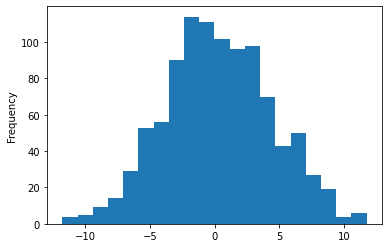

In [ ]:
pd.Series(x).plot.hist(bins=20)

In [ ]:
rng.choice(['apple', 'pear', 'banana'])

'banana'

In [ ]:
rng.choice(range(10))

4

In [ ]:
rng.integers(0,10)

6

# Option pricing with Monte Carlo simulation

The famous Black-Scholes option pricing model begins by assuming that the price of the underlying security follows *Geometric Brownian Motion*:

$${\frac {dS_t}{S_t}}=\mu \,dt+\sigma \,dW_t.$$

In this model, in every “instant” $dt$, the percent change in price $dS/S$ changes by a small positive expected return (called “drift”), $\mu$, plus a random component that is either positive or negative (the "volatility"). $W_t$ is called a Wiener process with $dW_t \sim N(0,dt)$.

Black and Scholes proved that the price of a European call option, $C$, struck on this security must satisfy the stochastic differential equation 

$${\frac {\partial C}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}C}{\partial S^{2}}}+rS{\frac {\partial C}{\partial S}}-rC=0.$$

They also found the solution to this equation, giving the famous Black-Scholes option pricing formula:

$$C = S_0 N(d_1) - K e^{-rT} N(d_2),$$

where $$d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + T\left(r + \frac{\sigma^2}{2}\right)}{\sigma\sqrt{T}}$$ and $$d_2 = d_1 - \sigma\sqrt{T}.$$

$S_0$ is the current stock price, $K$ is the strike price, $T$ is the time remaining until the option expires, $r$ is the riskfree interest rate, and $\sigma$ is the volatility of the underlying security.

In [ ]:
import random
from math import log, sqrt, exp
from scipy.stats import norm

In [ ]:
def N(x):
    return norm.cdf(x, 0, 1)

In [ ]:
N(0)

0.5

In [ ]:
N(1.96)

0.9750021048517795

In [ ]:
N(-1.96)

0.024997895148220435

In [ ]:
def bs_call(S, K, T, r, sigma):
    ''' Black-Scholes price of a European call option '''
    d1 = (log(S/K) + (r + sigma**2/2)*T) / (sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    C = S*N(d1) - K*exp(-r*T)*N(d2)
    return C

In [ ]:
S0 = 100
K = 105
T = 1
r = 0.01
sigma = 0.2

bs_call(S0, K, T, r, sigma)

6.297254539086033

Rather than simulating the stochastic differential equation

$${\frac {dS_t}{S_t}}=\mu \,dt+\sigma \,dW_t,$$

we use the *Euler discretization* which gives

$$S_t = S_{t-\Delta t} \exp\left(\left(r-\frac{\sigma^2}{2}\right)\Delta t + \sigma\sqrt{\Delta t} z_t\right).$$

In [ ]:
random.seed(20000)

# Parameters
S0 = 100      # initial stock price
M = 50        # number of time steps
dt = T / M    # length of time interval
I = 25000     # number of paths

# Simulating I paths with M time steps
S = []
for i in range(I):
    path = [S0]
    for t in range(1, M+1):
        z = random.gauss(0,1)
        St = path[t-1] * exp((r-0.5*sigma**2)*dt + sigma*sqrt(dt)*z)
        path.append(St)
    S.append(path)

In [ ]:
len(S)

25000

In [ ]:
S[15783]

[100,
 92.88855250856874,
 91.56029550048595,
 90.6887591934537,
 89.52082024100051,
 85.20261500370225,
 83.30780480392345,
 80.39857243791693,
 83.05517966723833,
 83.7441634884775,
 81.42238652446433,
 80.51338524649434,
 77.5889132992504,
 80.73303328564657,
 79.4818204789349,
 77.09887560857894,
 75.62668327286454,
 75.90918452830734,
 78.44275893794307,
 79.70607013863186,
 82.79040968399987,
 82.66363491204996,
 86.82429673787381,
 89.98612887547154,
 88.5448388081366,
 89.86229137978182,
 88.23399238902047,
 85.60005029479797,
 85.03053099463145,
 85.20808368661775,
 89.74264075479645,
 88.73758303735032,
 86.38981532058686,
 86.35561092562318,
 88.0462523310335,
 89.63240769183452,
 90.60223665560542,
 90.3218190539043,
 92.35130267626407,
 94.04530320824084,
 93.30639759028766,
 94.39169600474796,
 92.27255481255752,
 92.5704444140864,
 92.39344453044994,
 93.07415922904248,
 94.03951416370364,
 96.8261802182761,
 94.9188931092227,
 92.54266109711772,
 92.73315902415169]

In [ ]:
max(S[2000][-1] - K, 0)

0

In [ ]:
max(S[1439][-1] - K, 0)

0

In [ ]:
terminal_values = [max(path[-1] - K, 0) for path in S]

The fair value of the option is its *expected value*, discounted back to the present. The expected value is simply the average of the values across the 25,000 simulations.

In [ ]:
exp(-r*T) * (sum(terminal_values) / I)

6.306115796602277

In [ ]:
# What is the probability that the stock price ends above K?

len([c for c in terminal_values if c>0]) / 25000

0.38688